In [1]:
import pandas as pd
import numpy as np 
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
df_can = pd.read_excel('./UN_All_CountryFiles/Canada.xlsx', sheet_name='Canada by Citizenship', skiprows=20, skipfooter=2)
df_can.head()

,Type,Coverage,OdName,AREA,AreaName,REG,RegName,DEV,DevName,1980,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Immigrants,Foreigners,Afghanistan,935,Asia,5501,Southern Asia,902,Developing regions,16,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Immigrants,Foreigners,Albania,908,Europe,925,Southern Europe,901,Developed regions,1,...,1450,1223,856,702,560,716,561,539,620,603
2,Immigrants,Foreigners,Algeria,903,Africa,912,Northern Africa,902,Developing regions,80,...,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
3,Immigrants,Foreigners,American Samoa,909,Oceania,957,Polynesia,902,Developing regions,0,...,0,0,1,0,0,0,0,0,0,0
4,Immigrants,Foreigners,Andorra,908,Europe,925,Southern Europe,901,Developed regions,0,...,0,0,1,1,0,0,0,0,1,1


In [6]:
df_can.drop(columns=['Type', 'Coverage', 'AREA', 'REG', 'DEV'], inplace=True)
df_can.rename(columns={'OdName':'Country', 'AreaName':'Continent', 'RegName':'Region'}, inplace=True)
df_can['Total'] = df_can.sum(axis=1, skipna=True)

In [7]:
df_can.set_index('Country', inplace=True)
df_can.index.name = None

In [8]:
plt.style.use('ggplot')

### create pie chart for Immigration to Canada by Continent [1980 - 2013]

In [14]:
df_continents = df_can.groupby('Continent').sum(axis=1)
df_continents

,Region,DevName,1980,1981,1982,1983,1984,1985,1986,1987,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Continent,,,,,,,,,,,,,,,,,,,,,
Africa,Northern AfricaMiddle AfricaWestern AfricaSout...,Developing regionsDeveloping regionsDeveloping...,3951,4363,3819,2671,2639,2650,3782,7494,...,27523,29188,28284,29890,34534,40892,35441,38083,38543,618948
Asia,Southern AsiaWestern AsiaWestern AsiaWestern A...,Developing regionsDeveloping regionsDeveloping...,31025,34314,30214,24696,27274,23850,28739,43203,...,159253,149054,133459,139894,141434,163845,146894,152218,155075,3317794
Europe,Southern EuropeSouthern EuropeWestern EuropeEa...,Developed regionsDeveloped regionsDeveloped re...,39760,44802,42720,24638,22287,20844,24370,46698,...,35955,33053,33495,34692,35078,33425,26778,29177,28691,1410947
Latin America and the Caribbean,CaribbeanSouth AmericaCaribbeanCaribbeanCentra...,Developing regionsDeveloping regionsDeveloping...,13081,15215,16769,15427,13678,15171,21179,28471,...,24747,24676,26011,26547,26867,28818,27856,27173,24950,765148
Northern America,Northern AmericaNorthern America,Developed regionsDeveloped regions,9378,10030,9074,7100,6661,6543,7074,7705,...,8394,9613,9463,10190,8995,8142,7677,7892,8503,241142
Oceania,PolynesiaAustralia and New ZealandMelanesiaMic...,Developing regionsDeveloped regionsDeveloping ...,1942,1839,1675,1018,878,920,904,1200,...,1585,1473,1693,1834,1860,1834,1548,1679,1775,55174


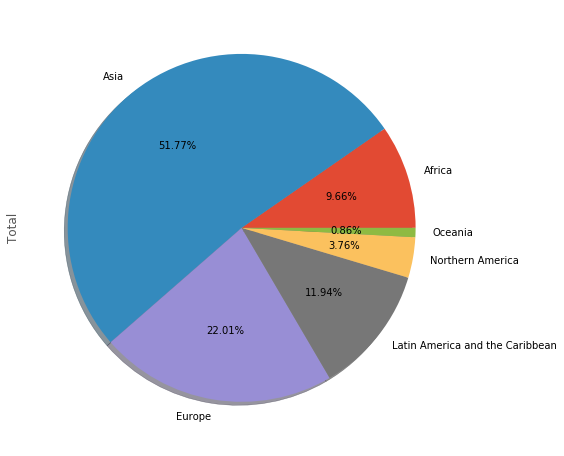

In [20]:
df_continents['Total'].plot(kind='pie', autopct='%0.2f%%', figsize=(8, 8), shadow=True)

### Question: Using a pie chart, explore the proportion (percentage) of new immigrants grouped by continents in the year 2013.

In [22]:
df_continents[2013]

Continent
Africa                              38543
Asia                               155075
Europe                              28691
Latin America and the Caribbean     24950
Northern America                     8503
Oceania                              1775
Name: 2013, dtype: int64

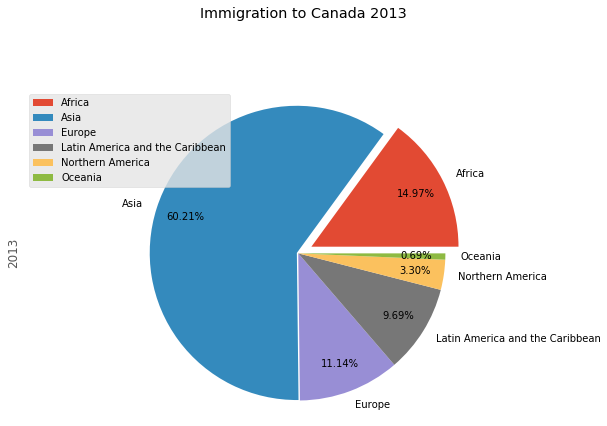

In [60]:
explode_ratios = [0.1, 0.01, 0, 0, 0, 0]

df_continents[2013].plot(kind='pie', 
                         figsize=(10,6), 
                         autopct='%.2f%%', 
                         pctdistance=0.8, 
                         explode=explode_ratios)
plt.title('Immigration to Canada 2013', x=0.5, y=1.2)
plt.axis('equal') 
plt.legend(labels=df_continents.index, loc='best', fontsize=10)